In [ ]:
# === Set NLTK Path for Offline Resources ===
import os
import nltk
nltk_path = '/Users/hanpham/nltk_data'
nltk.data.path.append(nltk_path)

# === Download Required NLTK Resources ===
nltk.download('punkt', download_dir=nltk_path)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)

# === Core Python Libraries ===
import re
import string
from collections import Counter

# === Data Handling ===
import pandas as pd
import numpy as np

# === NLP ===
from nltk import word_tokenize, pos_tag
from nltk.util import bigrams, ngrams
from nltk.corpus import stopwords

# === Visualization ===
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import networkx as nx

# === Text Analysis ===
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /Users/hanpham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hanpham/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanpham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('review_scrape_50.csv', header=0)

In [3]:
df.columns

Index(['title', 'Date', 'UserID ', 'All Review ', 'Reviews', 'Location Rating',
       'Rooms Rating', 'Service Rating', 'stars', 'Owner Response Date',
       'Owner Response'],
      dtype='object')

In [4]:
df = df.drop('All Review ', axis=1)

In [5]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response
0,New York Marriott Downtown,6/6/25 12:13,70209,NaN,NaN,NaN,NaN,4,NaN,NaN
1,New York Marriott Downtown,5/30/25 23:12,45412,NaN,5.0,4.0,5.0,5,NaN,NaN
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN
698,New York Marriott Marquis,5/22/25 8:11,19142,NaN,5.0,5.0,4.0,5,NaN,NaN


In [6]:
def get_brand(title):
    title_lower = str(title).lower()
    if 'w new york' in title_lower:
        return 'Marriott'
    elif 'marriott' in title_lower:
        return 'Marriott'
    elif 'intercontinental' in title_lower:
        return 'IHG'
    elif 'hilton' in title_lower:
        return 'Hilton'
    elif 'hyatt' in title_lower:
        return 'Hyatt'
    elif 'sofitel' in title_lower:
        return 'Accor'
    elif 'indigo' in title_lower:
        return 'IHG'
    elif 'sheraton' in title_lower:
        return 'Marriott'
    elif 'warwick' in title_lower:
        return 'Warwick'
    else:
        return ''

df['Brand'] = df['title'].apply(get_brand)

In [7]:
df = df.dropna(subset=["Reviews"])

In [8]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott
...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott


In [9]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

In [10]:
sentiment_df = df["Reviews"].apply(get_sentiment_scores).apply(pd.Series)

In [11]:
sentiment_df

,neg,neu,pos,compound
2,0.049,0.855,0.096,0.4215
3,0.000,0.474,0.526,0.9231
4,0.000,0.316,0.684,0.8650
5,0.088,0.912,0.000,-0.3404
9,0.212,0.788,0.000,-0.8658
...,...,...,...,...
694,0.000,0.371,0.629,0.8588
695,0.188,0.679,0.133,-0.3094
696,0.000,0.594,0.406,0.6249
697,0.000,0.586,0.414,0.7946


In [12]:
df = pd.concat([df, sentiment_df], axis=1)
df = df.rename(columns={
    'neg': 'Negative',
    'neu': 'Neutral',
    'pos': 'Positive',
    'compound': 'Compound'
})

In [13]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand,Negative,Neutral,Positive,Compound
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott,0.049,0.855,0.096,0.4215
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.474,0.526,0.9231
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.316,0.684,0.8650
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott,0.088,0.912,0.000,-0.3404
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott,0.212,0.788,0.000,-0.8658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.371,0.629,0.8588
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott,0.188,0.679,0.133,-0.3094
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.594,0.406,0.6249
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.586,0.414,0.7946


In [14]:
df.to_csv('hotel_reviews_with_sentiment.csv', index=False)

In [15]:
avg_sentiment_by_hotel = df.groupby("title")["Compound"].mean().reset_index()
avg_sentiment_by_hotel = avg_sentiment_by_hotel.sort_values(by="Compound", ascending=False)

In [16]:
avg_sentiment_by_hotel

,title,Compound
6,"InterContinental New York Times Square, an IHG...",0.762249
5,InterContinental New York Barclay by IHG,0.610273
7,"Marriott Vacation Club, New York City",0.607443
12,W New York - Times Square,0.548073
13,Warwick New York,0.539661
2,Hotel Indigo Lower East Side New York by IHG,0.497142
0,"Dream Downtown, by Hyatt",0.445130
8,New York Marriott Downtown,0.429655
11,Sofitel New York,0.421361
3,Hyatt Grand Central New York,0.378962


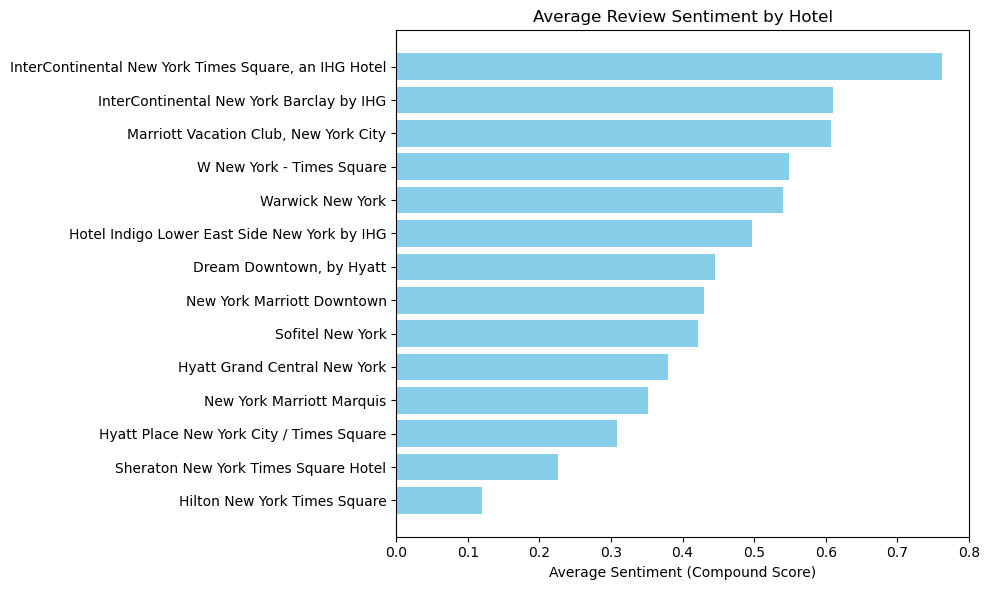

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(avg_sentiment_by_hotel["title"], avg_sentiment_by_hotel["Compound"], color="skyblue")
plt.xlabel("Average Sentiment (Compound Score)")
plt.title("Average Review Sentiment by Hotel")
plt.gca().invert_yaxis()  # Most positive at the top
plt.tight_layout()
plt.show()

This highlights standout properties and helps identify which hotels are excelling in service delivery based on guest feedback.

The top three hotels with the highest average sentiment scores are all premium IHG and one Marriott property, with InterContinental New York Times Square (IHG) significantly outperforming all others. This suggests that specific IHG hotels deliver a consistently superior guest experience at the individual property level

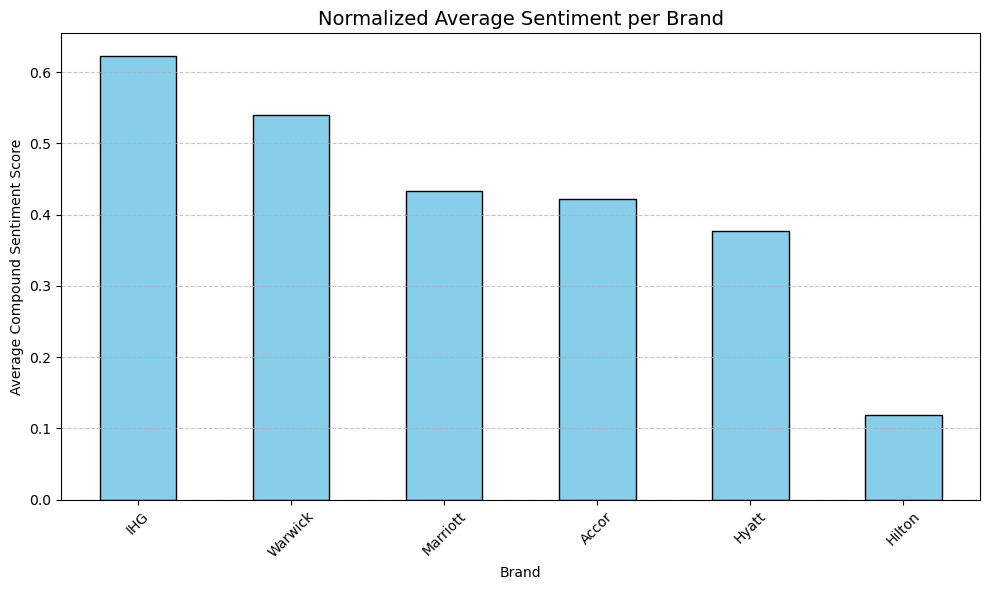

In [18]:
# Normalize sentiment score per brand by averaging across properties
property_avg = df.groupby(['Brand', 'title'])['Compound'].mean().reset_index()
brand_normalized_avg = property_avg.groupby('Brand')['Compound'].mean().sort_values(ascending=False)

# Plot normalized sentiment
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
brand_normalized_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Normalized Average Sentiment per Brand', fontsize=14)
plt.ylabel('Average Compound Sentiment Score')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This provides a macro-level view ideal for competitive benchmarking and brand reputation audits.

When sentiment is aggregated and normalized by brand, IHG continues to lead with the highest overall score, while Hilton falls well behind the rest. This indicates that IHG’s brand-wide service quality and customer perception are stronger and more consistent across properties, whereas Hilton may face systemic service or perception issues

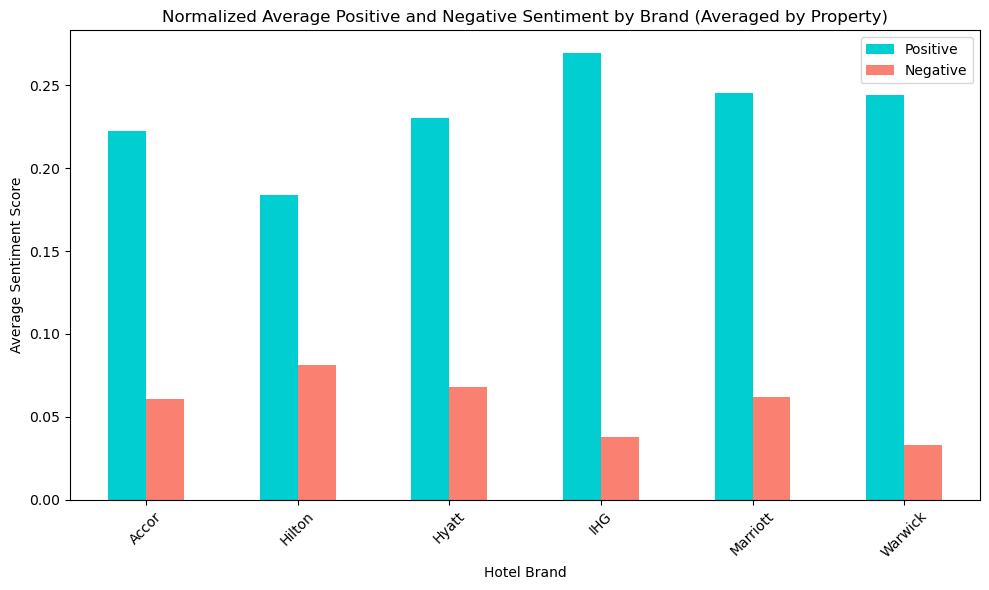

In [ ]:
property_sentiment = df.groupby(['Brand', 'title'])[['Positive', 'Negative']].mean().reset_index()

mean_pos_neg_normalized = property_sentiment.groupby('Brand')[['Positive', 'Negative']].mean()

mean_pos_neg_normalized.plot(kind='bar', stacked=False, figsize=(10, 6), color=['darkturquoise', 'salmon'])
plt.title('Normalized Average Positive and Negative Sentiment by Brand (Averaged by Property)')
plt.xlabel('Hotel Brand')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



This dual-axis view helps uncover the balance of guest feedback, not just volume — valuable for understanding brand health and emotional tone in guest interactions

IHG has the highest normalized positive sentiment and the lowest negative sentiment across all brands, reinforcing its brand strength not only in generating positive guest experiences but also in minimizing dissatisfaction. Hilton, in contrast, shows both the lowest positive and highest negative sentiment among the brands.”


In [20]:
property_sentiment

,Brand,title,Positive,Negative
0,Accor,Sofitel New York,0.222737,0.060816
1,Hilton,Hilton New York Times Square,0.183645,0.081226
2,Hyatt,"Dream Downtown, by Hyatt",0.238233,0.047070
3,Hyatt,Hyatt Grand Central New York,0.205853,0.087118
4,Hyatt,Hyatt Place New York City / Times Square,0.246222,0.070583
5,IHG,Hotel Indigo Lower East Side New York by IHG,0.187944,0.048444
6,IHG,InterContinental New York Barclay by IHG,0.260622,0.051541
7,IHG,"InterContinental New York Times Square, an IHG...",0.360821,0.013923
8,Marriott,"Marriott Vacation Club, New York City",0.304189,0.055865
9,Marriott,New York Marriott Downtown,0.277966,0.050207


Insight: IHG Dominates Sentiment Rankings Across All Levels of Aggregation

Across individual hotels, overall brand performance, and normalized sentiment (positive vs. negative), IHG stands out as the clear leader in guest satisfaction:

1.	Top Hotel Sentiment Leaders
The top two hotels with the highest average review sentiment scores are both IHG properties:
•	InterContinental New York Times Square and InterContinental New York Barclay score significantly above all others, indicating exceptional guest experiences at the property level.

2.	Brand-Level Sentiment Strength
•	IHG leads the pack in average compound sentiment when sentiment scores are averaged per brand, outperforming Warwick, Marriott, Accor, Hyatt, and especially Hilton — which shows the lowest sentiment by a wide margin, potentially signaling reputation or service issues.
	
3.	Positive vs. Negative Breakdown
IHG not only has the highest normalized positive sentiment but also one of the lowest normalized negative sentiment scores. This reflects both:
•	Strong guest satisfaction,
•	Effective mitigation of negative experiences.

Strategic Recommendation:

For competitive benchmarking or SEO audit presentation:
	•	IHG can serve as a benchmark brand when assessing how sentiment translates to reputation and potential local SEO performance.
	•	Conversely, Hilton should be analyzed further to uncover root causes behind low sentiment and identify opportunities for operational or customer experience improvements.


Marriot Property Focus 

In [21]:
# Filter Marriott reviews only
marriott_prop = df[df['Brand'] == 'Marriott']['title'].unique()
selected_marriott = np.random.choice(marriott_prop, size=3, replace=False)
marriott_df = df[df['title'].isin(selected_marriott)].copy()
marriott_df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand,Negative,Neutral,Positive,Compound
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott,0.049,0.855,0.096,0.4215
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.474,0.526,0.9231
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.316,0.684,0.8650
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott,0.088,0.912,0.000,-0.3404
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott,0.212,0.788,0.000,-0.8658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,"Marriott Vacation Club, New York City",12/28/24 7:19,80344,"●stop, complain on marriott corporate website,...",5.0,2.0,1.0,2,NaN,NaN,Marriott,0.121,0.635,0.244,0.8970
686,"Marriott Vacation Club, New York City",12/23/24 0:31,56639,i can’t believe i’m taking the time to write t...,5.0,2.0,1.0,1,NaN,NaN,Marriott,0.089,0.803,0.108,0.9347
687,"Marriott Vacation Club, New York City",12/21/24 16:07,41590,room was clean and easy to maneuver around. if...,NaN,NaN,NaN,5,NaN,NaN,Marriott,0.000,0.826,0.174,0.9097
688,"Marriott Vacation Club, New York City",12/19/24 23:50,91471,the location is great close to everything plus...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.662,0.338,0.9635


In [22]:
negative_reviews = df[df['Compound'] < 0]['Reviews']
custom_stopwords = set([
    "hotel", "room", "rooms", "stay", "staff", "location", "experience", "place"
])

vectorizer_negative = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # words with 3+ letters
)

# Remove extra stop words manually
negative_reviews_cleaned = negative_reviews.str.lower().replace(r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True)
tfidf_matrix_negative = vectorizer_negative.fit_transform(negative_reviews_cleaned)

In [23]:
# Sum TF-IDF scores across all documents to get overall importance
tfidf_scores = tfidf_matrix_negative.sum(axis=0).A1
words = vectorizer_negative.get_feature_names_out()
tfidf_df_negative = pd.DataFrame({'word': words, 'tfidf': tfidf_scores})

# Sort by importance
tfidf_df_negative = tfidf_df_negative.sort_values(by='tfidf', ascending=False)
print(tfidf_df_negative.head(10))

       word      tfidf
37  service  11.060666
7     check   7.022001
22     like   7.002870
16     good   6.426913
48    water   6.311365
49    worst   6.168035
21     just   6.044728
9      desk   5.980997
35     rude   5.839506
26    night   5.723863


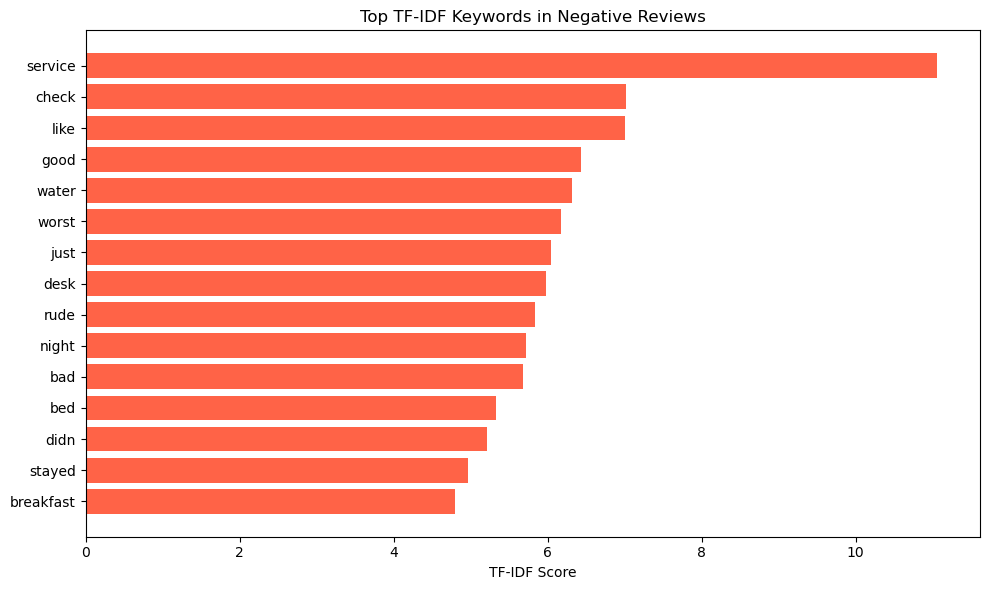

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(tfidf_df_negative['word'].head(15), tfidf_df_negative['tfidf'].head(15), color='tomato')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Negative Reviews')
plt.xlabel('TF-IDF Score')
plt.tight_layout()
plt.show()

Across 14 hotel properties in New York, guest sentiment consistently flagged issues related to staff interactions — particularly front desk service. Words such as ‘staff’, ‘desk’, ‘disappointed’, and ‘noise’ surfaced as top TF-IDF weighted terms in negative reviews. This points to a potential service training gap that spans multiple locations, warranting brand-level intervention.

In [25]:
positive_reviews = df[df['Compound'] > 0.4]['Reviews'].dropna()
# Clean text and remove custom stopwords
positive_reviews_cleaned = positive_reviews.str.lower().replace(
    r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True
)
# Create TF-IDF vectorizer
vectorizer_positive = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

tfidf_matrix_positive = vectorizer_positive.fit_transform(positive_reviews_cleaned)

words_positive = vectorizer_positive.get_feature_names_out()
tfidf_scores_positive = tfidf_matrix_positive.sum(axis=0).A1

tfidf_df_positive = pd.DataFrame({'word': words_positive, 'tfidf': tfidf_scores_positive})
tfidf_df_positive = tfidf_df_positive.sort_values(by='tfidf', ascending=False)

print(tfidf_df_positive.head(10))


         word      tfidf
21      great  42.409445
40    service  32.600477
20       good  27.756107
31       nice  27.369280
7       clean  24.650642
19   friendly  21.661069
3   breakfast  18.658737
42     square  18.033378
46      times  17.610043
15  excellent  17.145084


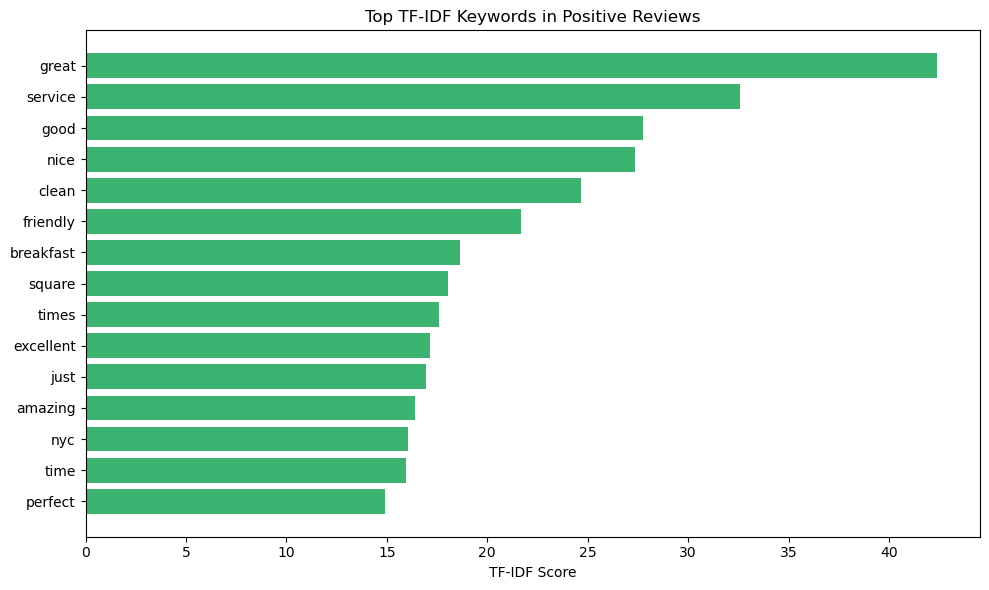

In [26]:

plt.figure(figsize=(10, 6))
plt.barh(tfidf_df_positive['word'].head(15), tfidf_df_positive['tfidf'].head(15), color='mediumseagreen')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Positive Reviews')
plt.xlabel('TF-IDF Score')
plt.tight_layout()
plt.show()

In [27]:
marriott_positive_reviews = marriott_df[
    (marriott_df['Brand'] == 'Marriott') & (marriott_df['Compound'] > 0.4)
]['Reviews'].dropna().str.lower()
marriott_positive_reviews

2      perfect location for exploring downtown manhat...
3      super comfy beds and kept wonderfully clean. w...
4            wonderful service and great room service!!!
12     decent hotel in downtown manhattan with good r...
13     the hotel is a bit old but well maintained and...
                             ...                        
684                      excellent customer care service
685    ●stop, complain on marriott corporate website,...
686    i can’t believe i’m taking the time to write t...
687    room was clean and easy to maneuver around. if...
688    the location is great close to everything plus...
Name: Reviews, Length: 70, dtype: object

In [28]:
marriott_reviews_cleaned = marriott_positive_reviews.replace(
    r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True
)

# 3. Run TF-IDF
vectorizer_marriott_positive = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

tfidf_matrix_marriott_positive = vectorizer_marriott_positive.fit_transform(marriott_reviews_cleaned)
words_marriott_positive = vectorizer_marriott_positive.get_feature_names_out()
tfidf_scores_marriott_positive = tfidf_matrix_marriott_positive.sum(axis=0).A1

# 4. Create and display results
tfidf_df_marriott_positive = pd.DataFrame({'word': words_marriott_positive, 'tfidf': tfidf_scores_marriott_positive})
tfidf_df_marriott_positive = tfidf_df_marriott_positive.sort_values(by='tfidf', ascending=False)

print(tfidf_df_marriott_positive.head(10))


        word     tfidf
19     great  9.945101
7      clean  6.915533
36   service  6.356065
29      nice  5.924056
18      good  5.628537
17  friendly  5.406434
3        bar  4.577444
38    square  4.382933
42     times  3.972363
5        bit  3.832944


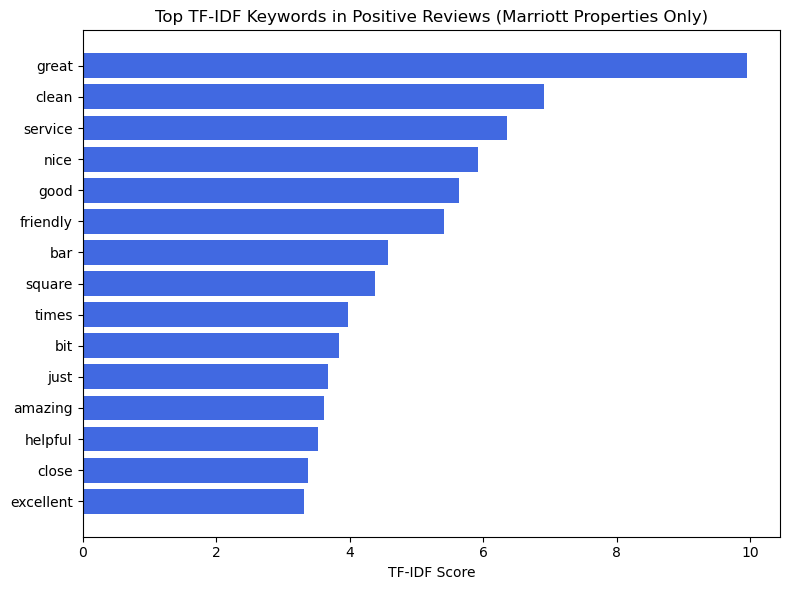

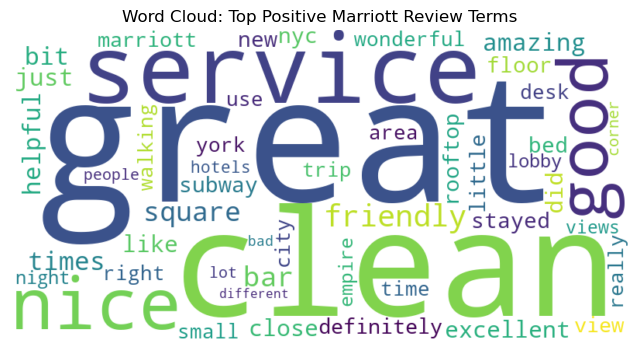

In [29]:
plt.figure(figsize=(8, 6))
plt.barh(tfidf_df_marriott_positive['word'].head(15), tfidf_df_marriott_positive['tfidf'].head(15), color='royalblue')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Positive Reviews (Marriott Properties Only)')
plt.xlabel('TF-IDF Score')
plt.tight_layout()
plt.show()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(tfidf_df_marriott_positive['word'], tfidf_df_marriott_positive['tfidf']))
)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Top Positive Marriott Review Terms")
plt.show()

In [30]:
marriott_negative_reviews = marriott_df[
    (marriott_df['Brand'] == 'Marriott') & (marriott_df['Compound'] < 0)
]['Reviews'].dropna().str.lower()
marriott_negative_reviews

5      they have a hidden destination fee which i did...
9      hotel was dirty - my son got bites or a rash o...
14                      terrible service , rest was good
32     do not book the times square view room. it is ...
34     the hotel is actually really gross. dirty and ...
58     the staff was absolutely rude from start to fi...
62     i paid 1500 for one night for wednesday in the...
112    arrived with a reservation at midnight, no roo...
117    the room is kinda old, the service is on par b...
621    will never stay again. got asked to come to th...
626    this hotel made fraudulent charges on my card,...
628    fine hotel, but for the love of god, do not be...
630    service below all criticism, we booked a quiet...
634    terrible service, rooms are never cleaned thor...
639    place was good. but… the marketing calls from ...
Name: Reviews, dtype: object

In [31]:
marriott_negative_cleaned = marriott_negative_reviews.replace(
    r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True
)
vectorizer_marriott_negative = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)
tfidf_matrix_marriott_negative = vectorizer_marriott_negative.fit_transform(marriott_negative_cleaned)
words_marriott_negative = vectorizer_marriott_negative.get_feature_names_out()
tfidf_scores_marriott_negative = tfidf_matrix_marriott_negative.sum(axis=0).A1

tdidf_marriott_negative = pd.DataFrame({'word': words_marriott_negative, 'tfidf': tfidf_scores_marriott_negative})
tdidf_marriott_negative = tdidf_marriott_negative.sort_values(by='tfidf', ascending=False)
print(tdidf_marriott_negative.head(10))

        word     tfidf
40   service  1.521640
42  terrible  1.374777
38    really  1.284457
3       club  1.278244
45  vacation  1.278244
15      like  1.232998
49     worst  1.210715
10      good  1.153951
6      dirty  1.096581
11       got  1.025520


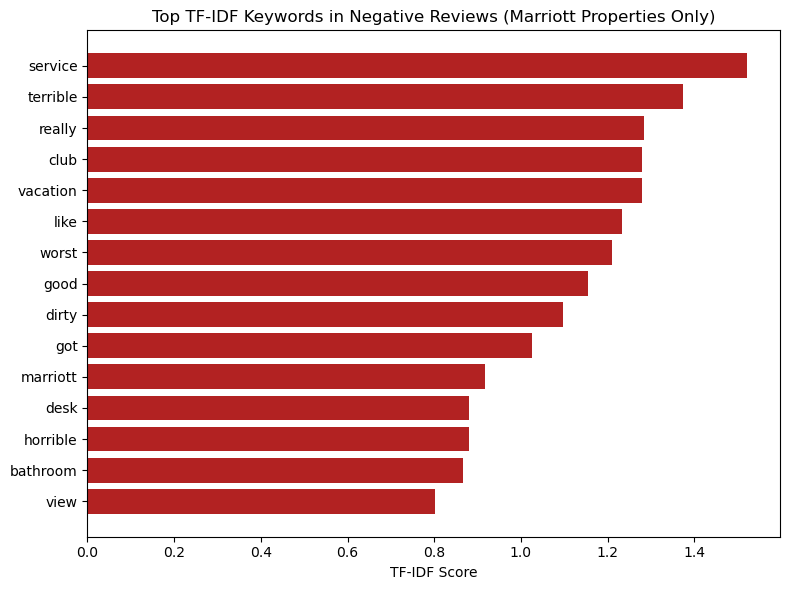

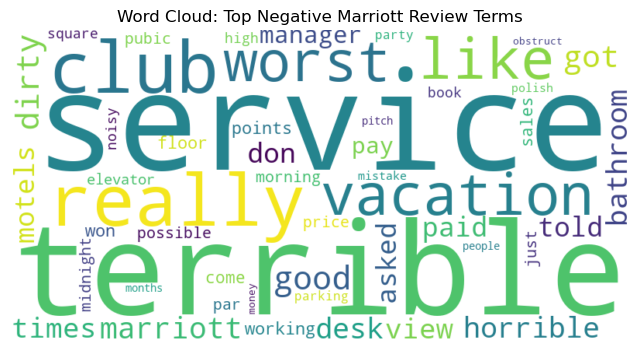

In [32]:
plt.figure(figsize=(8, 6))
plt.barh(tdidf_marriott_negative['word'].head(15), tdidf_marriott_negative['tfidf'].head(15), color='firebrick')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Negative Reviews (Marriott Properties Only)')
plt.xlabel('TF-IDF Score')
plt.tight_layout()
plt.show()
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(tdidf_marriott_negative['word'], tdidf_marriott_negative['tfidf']))
)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Top Negative Marriott Review Terms")
plt.show()

In [33]:
#Extracting all reviews containing the word "great" from marriott_positive_reviews
great_reviews = marriott_positive_reviews[marriott_positive_reviews.str.contains(r'great', na=False)]

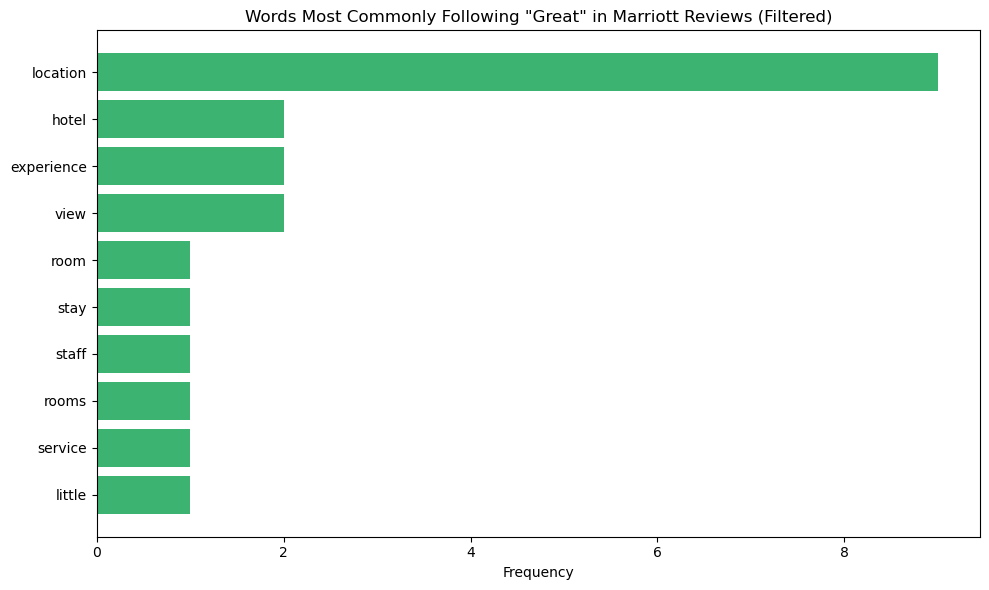

In [36]:
# Custom set of stopwords (optional: expand it)
common_stopwords = set(stopwords.words('english')).union(set(string.punctuation))

# Focus on tokens that follow 'great'
following_words = []

for review in great_reviews:
    tokens = word_tokenize(review.lower())
    for i, word in enumerate(tokens[:-1]):
        next_word = tokens[i+1]
        if word == "great" and next_word not in common_stopwords:
            following_words.append(next_word)

# Count and plot
follow_counts = Counter(following_words).most_common(10)
words, counts = zip(*follow_counts)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='mediumseagreen')
plt.xlabel("Frequency")
plt.title('Words Most Commonly Following "Great" in Marriott Reviews (Filtered)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Owner Response rate Analysis- Guidelines to the analysis to answer these questions 
1. Response Strategy by Sentiment
	•	Are negative reviews more likely to get responses than positive ones?
	•	This shows whether the business prioritizes damage control over appreciation.

2. Consistency & Professionalism
	•	Are responses consistent in tone and structure (e.g., templated)?
	•	You can identify branding adherence or lack of effort.

3. Topic Matching
	•	Even if one-way, does the business address the specific concern? (e.g., if a review mentions “dirty bathroom,” does the response acknowledge it?)
	•	Shows whether the response is thoughtful or generic.

4. Empathy vs. Defensiveness
	•	Use NLP/sentiment to classify tone:
	•	Empathetic: “We’re so sorry for the inconvenience…”
	•	Defensive: “Our team followed proper protocol…”
	•	This reveals brand positioning and customer-centricity.

5. Response Rate
	•	A low response rate might signal SEO neglect, since response frequency boosts Google visibility.

6. Length & Specificity
	•	Word count distribution can signal:
	•	One-liner templates (“Thanks for your feedback!”) vs.
	•	Detailed follow-ups (“We’ve informed our housekeeping manager…”).

In [39]:
# Create sentiment category
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Compound'].apply(categorize_sentiment)

# Define a binary indicator for owner response
df['Has_Response'] = df['Owner Response'].notna()

# Calculate response rate by sentiment
response_rate_by_sentiment = df.groupby('Sentiment')['Has_Response'].mean().reset_index()
response_rate_by_sentiment.columns = ['Sentiment', 'Response Rate']

response_rate_by_sentiment

,Sentiment,Response Rate
0,Negative,0.461538
1,Neutral,0.444444
2,Positive,0.463415
